In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spin_models as spin
import Merger_rate_plot as merg
import BH_binary_kicks_data as gw_kick
import Kickrateplots as kick

In [2]:
import scienceplots
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
Binary_filename = "/Users/pranavsatheesh/Triples/Github/Illustris_Data/iso_binaries_data_from_ill.csv"
triple_filename = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"
all_triples_file = "/Users/pranavsatheesh/Triples/Github/Illustris_Data/all_triples_data_from_ill.csv"

In [4]:
savepath = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/"

In [5]:
df_binary_w_kick = gw_kick.binary_kick_assign(Binary_filename)
df_iso_binary_w_kick = df_binary_w_kick[df_binary_w_kick["merger_flag"]=="Yes"]
df_iso_binary_w_kick.head()

,M1,M2,qin,t_merger,z_merger,gw_kick_random,gw_kick_5deg,gw_kick_hybrid,merger_flag,bhid1,bhid2,f-gas,Vescape
0,2.260508e+06,1.628522e+06,0.720423,8.585867e+08,6.460270,1271.554700,312.438983,535.904021,Yes,9223372036326575607,9223372036365264250,0.736201,1066.081124
1,1.614294e+06,1.077030e+06,0.667183,8.924214e+08,6.270490,768.647682,170.254591,323.087211,Yes,9223372036330308081,9223372036383756962,0.851595,1124.251110
2,6.552913e+06,1.175374e+06,0.179367,3.833599e+09,1.720798,491.220109,236.854565,261.638040,Yes,9223372036306477048,9223372036351439102,0.192233,3225.589960
5,2.594471e+06,1.828861e+06,0.704907,1.008202e+09,5.702360,2372.531236,219.763666,230.729894,Yes,9223372036405417417,9223372036501930090,0.155198,411.624105
6,6.833995e+06,1.227516e+06,0.179619,3.200552e+09,2.080566,532.410722,76.005639,93.941824,Yes,9223372036315813145,9223372036570133338,0.653175,1214.901739


In [6]:
df_iso_binary_w_kick.to_csv(savepath+"iso_binaries_w_kick.csv",index=False)

In [7]:
df_all_triples = pd.read_csv(all_triples_file,index_col= False)
df_weak_triples = df_all_triples[df_all_triples["strong_key"]!=True]
df_weak_triples = gw_kick.weak_triples_assign(df_weak_triples)
df_weak_triples.head()

,M1,M2,M3,qin,qout,gw_kick_random,gw_kick_5deg,gw_kick_hybrid,t_triple_form,z_merger,a_2nd_ovtks,bin_merger_flag,strong_key,bhid1,bhid2,bhid3,bhid4,f-gas,Vescape
1,3.912370e+07,1.846347e+07,6.650001e+06,0.471926,0.115477,372.052638,345.350052,105.393970,1.496718e+09,0.000000,471.876452,No,False,7485090281198742830,9223372036486510624,9223372036486510624,9223372036599118495,0.666242,1604.091069
3,3.150303e+07,6.011976e+06,3.975624e+06,0.190838,0.105974,115.925433,123.591913,88.413906,1.377549e+09,1.180100,453.853986,Yes,False,9223372036605218289,9223372036813088478,9223372036454186084,9223372036813088478,0.650777,1408.377441
6,5.494314e+07,2.850695e+07,2.885805e+06,0.518845,0.034581,1149.827062,369.249598,213.334699,2.806229e+09,0.000000,988.335302,No,False,9223372036843855543,9223372036897966438,9223372036897966438,9223372038052823196,0.851971,1134.621416
7,2.316930e+08,7.044743e+07,1.791982e+07,0.304055,0.059310,780.534077,251.473996,243.421821,1.837550e+09,1.645236,800.887437,Yes,False,9223372036331263577,9223372036581589630,9223372036536320012,9223372036581589630,0.709038,1886.949467
9,1.961472e+07,3.186464e+06,5.226815e+06,0.162453,0.229234,489.180540,119.177820,156.605410,1.480912e+09,1.542943,935.811641,Yes,False,9223372036480012739,9223372036927653932,9223372036667069544,9223372036927653932,0.708784,1471.813824


In [8]:
df_weak_triples.to_csv(savepath+"weak_triples_w_kick.csv",index=False)

In [9]:
np.median(np.concatenate([df_all_triples["Vescape"],df_iso_binary_w_kick["Vescape"]]))

1311.789936679982

In [10]:
np.mean(np.concatenate([df_all_triples["Vescape"],df_iso_binary_w_kick["Vescape"]]))

1580.8361288779308

In [11]:
df_trip_kick = pd.read_csv(triple_filename) 
df_trip_kick.head()

,M1,M2,M3,qin,qout,t_merger,z_merger,a_triple_int,merger_flag,Slingshot_kick,...,t_triple_form,z_form,a_2nd_ovtks,bin_merger_flag,bhid1,bhid2,bhid3,bhid4,f-gas,Vescape
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,1.752527e+09,3.630205,0.035402,Tr-ej,2201.057217,...,1.352693e+09,4.507494,0.006986,Yes,9223372036337899864,9223372036518620732,9223372036417148615,9223372036518620732,0.381619,3429.773746
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,1.139149e+10,0.192264,0.213378,Tr-ej,803.621211,...,5.596503e+09,1.083700,0.216358,Yes,9223372036342602658,9223372036486077725,9223372036486077725,9223372036893973198,0.595837,1390.661938
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,8.375550e+10,0.000000,0.056183,No,1611.662895,...,1.100114e+10,0.229301,0.056611,No,9223372036798549652,9223372036831413043,9223372036831413043,9223372039019874757,0.845373,851.131643
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,1.037072e+11,0.000000,0.071615,No,851.491213,...,1.303832e+10,0.053799,0.072537,No,9175344300051172004,9223372036970140153,9223372036970140153,9223372040703864032,0.874041,827.301270
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,4.006093e+10,0.000000,0.166512,No,270.385087,...,3.438074e+09,1.932992,0.169430,No,9223372036604300802,9223372036858472384,9223372036849763822,9223372036858472384,0.811056,498.691989


### Distribution of Kick Velocities

In [12]:
vbinsize = 0.17
vmax = 6
sling_vcount,vbin_edges=np.histogram(np.log10(df_trip_kick[df_trip_kick["Slingshot_kick"]>0]["Slingshot_kick"]),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
rand_vcount,vbin_edges=np.histogram(np.concatenate((np.log10(df_trip_kick[df_trip_kick["gw_kick_random"]>0]["gw_kick_random"]),np.log10(df_weak_triples[df_weak_triples["gw_kick_random"]>0]["gw_kick_random"]))),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
hybrid_vcount,vbin_edges=np.histogram(np.concatenate((np.log10(df_trip_kick[df_trip_kick["gw_kick_hybrid"]>0]["gw_kick_hybrid"]),np.log10(df_weak_triples[df_weak_triples["gw_kick_random"]>0]["gw_kick_random"]))),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
vbins = vbin_edges[:-1] + 0.5*vbinsize

In [13]:
Ntriples = 520
Nruns =100

slings =[]
sling_max = []
sling_min = []
sling_g600 =[]

rands =[]
rand_max = []
rand_min = []
rand_g600 =[]

hybrids =[]
hybrid_max = []
hybrid_g600 = []

deg5s =[]
deg5_max = []
deg5_g600 = []

vbinsize = 0.17

for i in range(Nruns):
    df_trip_i = df_trip_kick[Ntriples*i:Ntriples*(i+1)]
    sling_v = df_trip_i[df_trip_i["Slingshot_kick"]>0]["Slingshot_kick"].to_numpy()
    sling_max.append(np.max(sling_v))
    sling_min.append(np.min(sling_v))
    sling_g600.append(len(sling_v[sling_v>600])/len(sling_v))

    rand_v = np.concatenate((df_trip_kick[df_trip_kick["gw_kick_random"]>0]["gw_kick_random"].to_numpy(),df_weak_triples[df_weak_triples["gw_kick_random"]>0]["gw_kick_random"].to_numpy(),df_iso_binary_w_kick[df_iso_binary_w_kick["gw_kick_random"]>0]["gw_kick_random"].to_numpy()))
    rand_max.append(np.max(rand_v))
    rand_min.append(np.min(rand_v))
    rand_g600.append(len(rand_v[rand_v>600])/len(rand_v))

    hybrid_v = np.concatenate((df_trip_kick[df_trip_kick["gw_kick_hybrid"]>0]["gw_kick_hybrid"].to_numpy(),df_weak_triples[df_weak_triples["gw_kick_hybrid"]>0]["gw_kick_hybrid"].to_numpy(),df_iso_binary_w_kick[df_iso_binary_w_kick["gw_kick_hybrid"]>0]["gw_kick_hybrid"].to_numpy()))
    hybrid_max.append(np.max(hybrid_v))
    hybrid_g600.append(len(hybrid_v[hybrid_v>600])/len(hybrid_v))

    deg5_v = np.concatenate((df_trip_kick[df_trip_kick["gw_kick_5deg"]>0]["gw_kick_5deg"].to_numpy(),df_weak_triples[df_weak_triples["gw_kick_5deg"]>0]["gw_kick_5deg"].to_numpy(),df_iso_binary_w_kick[df_iso_binary_w_kick["gw_kick_5deg"]>0]["gw_kick_5deg"].to_numpy()))
    deg5_max.append(np.max(deg5_v))
    deg5_g600.append(len(deg5_v[deg5_v>600])/len(deg5_v))
    
    sling_vcount,vbin_edges=np.histogram(np.log10(sling_v),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
    rand_vcount,vbin_edges=np.histogram(np.log10(rand_v),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
    hybrid_vcount,vbin_edges=np.histogram(np.log10(hybrid_v),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
    deg5_vcount,vbin_edges=np.histogram(np.log10(deg5_v),range=(0,vmax),bins = int(vmax/vbinsize),density=True)
    vbins = vbin_edges[:-1] + 0.5*vbinsize

    slings.append(sling_vcount)
    rands.append(rand_vcount)
    hybrids.append(hybrid_vcount)
    deg5s.append(deg5_vcount)

In [14]:
print("Fraction of sling velocity abover 600 km/s is %3.2f %%"%(np.mean(sling_g600)*100))
print("Fraction of random velocity abover 600 km/s is %3.2f %%"%(np.mean(rand_g600)*100))
print("Fraction of hybrid velocity abover 600 km/s is %3.2f %%"%(np.mean(hybrid_g600)*100))
print("Fraction of aligned velocity abover 600 km/s is %3.2f %%"%(np.mean(deg5_g600)*100))

Fraction of sling velocity abover 600 km/s is 14.99 %
Fraction of random velocity abover 600 km/s is 32.14 %
Fraction of hybrid velocity abover 600 km/s is 5.72 %
Fraction of aligned velocity abover 600 km/s is 0.03 %


In [15]:
print("The maximum sling kick is %3.2f km/s"%(np.mean(sling_max)))
print("The minimum sling kick is %3.2f km/s"%(np.mean(sling_min)))
print("--------")
print("The maximum random kick is %3.2f km/s"%(np.mean(rand_max)))
print("The minimum random kick is %3.2f km/s"%(np.mean(rand_min)))
print("--------")
print("The maximum hybrid kick is %3.2f km/s"%(np.mean(hybrid_max)))
print("The maximum aligned kick is %3.2f km/s"%(np.mean(deg5_max)))

The maximum sling kick is 8112.79 km/s
The minimum sling kick is 3.23 km/s
--------
The maximum random kick is 3527.53 km/s
The minimum random kick is 0.00 km/s
--------
The maximum hybrid kick is 2485.45 km/s
The maximum aligned kick is 632.76 km/s


In [16]:
sling_above_hybrid = []
for i in range(Nruns):
    df_trip_i = df_trip_kick[Ntriples*i:Ntriples*(i+1)]
    sling_v = df_trip_i[df_trip_i["Slingshot_kick"]>0]["Slingshot_kick"].to_numpy()
    sling_above_hybrid.append(len(sling_v[sling_v>np.mean(hybrid_max)])/len(sling_v))
print("Fraction of slingshot kicks above the maximum produced by Hybrid model is %2.3f"%(np.mean(sling_above_hybrid)))

Fraction of slingshot kicks above the maximum produced by Hybrid model is 0.016


In [17]:
kick_colors = {'slingshot':"green",'random':"#ca0020","hybrid":"#92c5de","deg5":"#0571b0"}

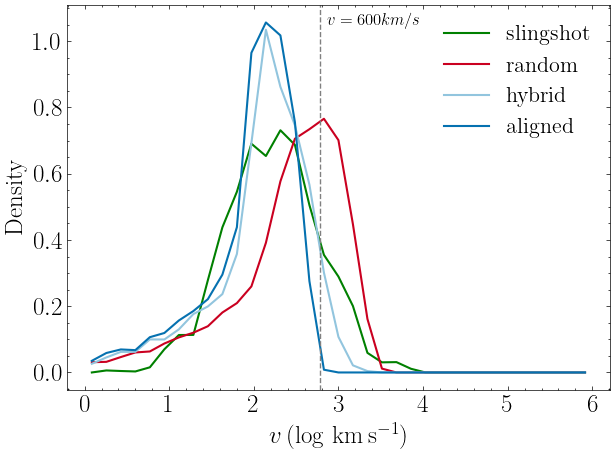

In [18]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=[7,5])
plt.plot(vbins,np.mean(slings,axis=0),label="slingshot",color=kick_colors['slingshot'],linewidth=1.5)
plt.plot(vbins,np.mean(rands,axis=0),label="random",color=kick_colors['random'],linewidth=1.5)
plt.plot(vbins,np.mean(hybrids,axis=0),label="hybrid",color=kick_colors['hybrid'],linewidth=1.5)
plt.plot(vbins,np.mean(deg5s,axis=0),label="aligned",color=kick_colors['deg5'],linewidth=1.5)
plt.axvline(x=np.log10(600),color="grey",linestyle="--")
plt.legend(fontsize=16)
plt.xlabel(r"$v \, (\log \, \text{km} \, \text{s}^{-1}$)",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.text(np.log10(600)+0.09,1.05,'$v = 600 km/s$',fontsize=12)
plt.savefig("Figures/kick_velocities_sling_and_gws_dist.pdf")


### Stats of escape from kicks

In [19]:
## For triples
Nruns = 100
Ntriple = 520
sling_esc = []
rand_esc=[]
hybrid_esc=[]
deg5_esc= []

for i in range(Nruns):
    df_trip_kick_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
    sling_esc.append(len(df_trip_kick_i[df_trip_kick_i["Slingshot_kick"] > df_trip_kick_i["Vescape"]]))
    rand_esc.append(len(df_trip_kick_i[df_trip_kick_i["gw_kick_random"] > df_trip_kick_i["Vescape"]]))
    hybrid_esc.append(len(df_trip_kick_i[df_trip_kick_i["gw_kick_hybrid"] > df_trip_kick_i["Vescape"]]))
    deg5_esc.append(len(df_trip_kick_i[df_trip_kick_i["gw_kick_5deg"] > df_trip_kick_i["Vescape"]]))

In [20]:
print("Out of 520 strong triples...")
print("%2.3f %% have slingshot kicks above Vesc"%(np.mean(sling_esc)/520 * 100))
print("%2.3f %% have GW-random kicks above Vesc"%(np.mean(rand_esc)/520 * 100))
print("%2.3f %% have GW-hybrid kicks above Vesc"%(np.mean(hybrid_esc)/520 * 100))
print("%2.3f %% have GW-deg5 kicks above Vesc"%(np.mean(deg5_esc)/520 * 100))

Out of 520 strong triples...
6.119 % have slingshot kicks above Vesc
7.519 % have GW-random kicks above Vesc
0.923 % have GW-hybrid kicks above Vesc
0.133 % have GW-deg5 kicks above Vesc


In [21]:
N_weak = len(df_weak_triples)
print("Out of %2d weak triples..."%(N_weak))
print("%2.3f %% have GW-random kicks above Vesc"%(len(df_weak_triples[df_weak_triples["gw_kick_random"] > df_weak_triples["Vescape"]])/N_weak * 100))
print("%2.3f %% have GW-hybrid kicks above Vesc"%(len(df_weak_triples[df_weak_triples["gw_kick_hybrid"] > df_weak_triples["Vescape"]])/N_weak * 100))
print("%2.3f %% have GW-deg5 kicks above Vesc"%(len(df_weak_triples[df_weak_triples["gw_kick_5deg"] > df_weak_triples["Vescape"]])/N_weak * 100))

Out of 1509 weak triples...
8.549 % have GW-random kicks above Vesc
0.663 % have GW-hybrid kicks above Vesc
0.066 % have GW-deg5 kicks above Vesc


In [22]:
N_binary = len(df_binary_w_kick)
print("Out of %2d isolated binaries..."%(N_binary))
print("%2.3f %% have GW-random kicks above Vesc"%(len(df_binary_w_kick[df_binary_w_kick["gw_kick_random"] > df_binary_w_kick["Vescape"]])/N_binary * 100))
print("%2.3f %% have GW-hybrid kicks above Vesc"%(len(df_binary_w_kick[df_binary_w_kick["gw_kick_hybrid"] > df_binary_w_kick["Vescape"]])/N_binary * 100))
print("%2.3f %% have GW-deg5 kicks above Vesc"%(len(df_binary_w_kick[df_binary_w_kick["gw_kick_5deg"] > df_binary_w_kick["Vescape"]])/N_binary * 100))

Out of 7205 isolated binaries...
14.684 % have GW-random kicks above Vesc
1.402 % have GW-hybrid kicks above Vesc
0.167 % have GW-deg5 kicks above Vesc


In [23]:
## For all systems
Nruns = 100
Ntriple = 520
sling_esc = []
rand_esc=[]
hybrid_esc=[]
deg5_esc= []

for i in range(Nruns):
    df_trip_kick_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
    sling_esc.append(len(df_trip_kick_i[df_trip_kick_i["Slingshot_kick"] > df_trip_kick_i["Vescape"]]))

    rand_esc.append(len(df_binary_w_kick[df_binary_w_kick["gw_kick_random"] > df_binary_w_kick["Vescape"]]) 
    + len(df_weak_triples[df_weak_triples["gw_kick_random"] > df_weak_triples["Vescape"]])
    +len(df_trip_kick_i[df_trip_kick_i["gw_kick_random"] > df_trip_kick_i["Vescape"]]))


    hybrid_esc.append(len(df_binary_w_kick[df_binary_w_kick["gw_kick_hybrid"] > df_binary_w_kick["Vescape"]]) 
    + len(df_weak_triples[df_weak_triples["gw_kick_hybrid"] > df_weak_triples["Vescape"]])
    +len(df_trip_kick_i[df_trip_kick_i["gw_kick_hybrid"] > df_trip_kick_i["Vescape"]]))


    deg5_esc.append(len(df_binary_w_kick[df_binary_w_kick["gw_kick_5deg"] > df_binary_w_kick["Vescape"]]) 
    + len(df_weak_triples[df_weak_triples["gw_kick_5deg"] > df_weak_triples["Vescape"]])
    +len(df_trip_kick_i[df_trip_kick_i["gw_kick_5deg"] > df_trip_kick_i["Vescape"]]))
    

In [24]:
print("Out of 9234 systems...")
print("%2.3f %% have slingshot kicks above Vesc"%(np.mean(sling_esc)/9234 * 100))
print("%2.3f %% have GW-random kicks above Vesc"%(np.mean(rand_esc)/9234 * 100))
print("%2.3f %% have GW-hybrid kicks above Vesc"%(np.mean(hybrid_esc)/9234 * 100))
print("%2.3f %% have GW-deg5 kicks above Vesc"%(np.mean(deg5_esc)/9234 * 100))

Out of 9234 systems...
0.345 % have slingshot kicks above Vesc
13.278 % have GW-random kicks above Vesc
1.254 % have GW-hybrid kicks above Vesc
0.148 % have GW-deg5 kicks above Vesc


In [26]:
print("Out of 9234 systems...")
print("%2.3f %% have slingshot kicks above Vesc"%(np.mean(sling_esc)/9234 * 100))
print("%2.3f %% have GW-random kicks above Vesc"%(np.mean(rand_esc)/9234 * 100))
print("%2.3f %% have GW-hybrid kicks above Vesc"%(np.mean(hybrid_esc)/9234 * 100))
print("%2.3f %% have GW-deg5 kicks above Vesc"%(np.mean(deg5_esc)/9234 * 100))

Out of 9234 systems...
0.345 % have slingshot kicks above Vesc
13.549 % have GW-random kicks above Vesc
1.417 % have GW-hybrid kicks above Vesc
0.148 % have GW-deg5 kicks above Vesc


In [27]:
colo = ["royalblue","darkblue","brown","coral"]

### Number of kicks v above vt

$ R_{kicks} = N_{kicks} \, (l_{box})^{-3} \, (\Delta v)^{-1} \, Gpc^{-3} km^{-1} s$

3000


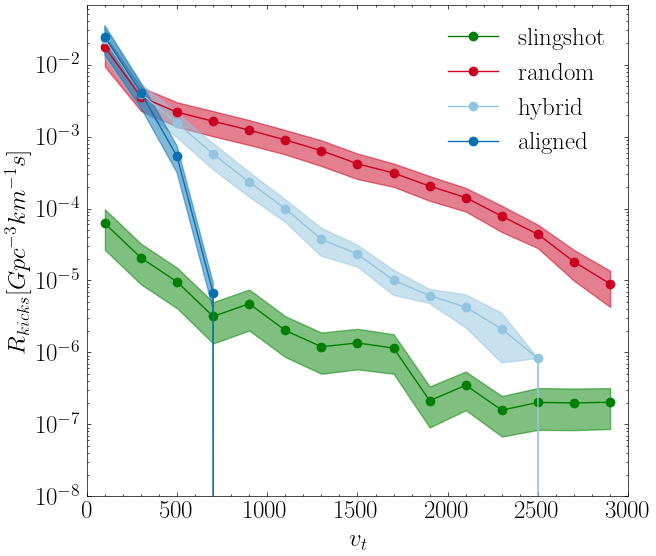

In [28]:
plt.rcParams.update({'font.size': 18})
fig = kick.plot_rate_kicks(df_trip_kick,df_weak_triples,df_binary_w_kick,v_max=3000,vbin_size=200)

3000


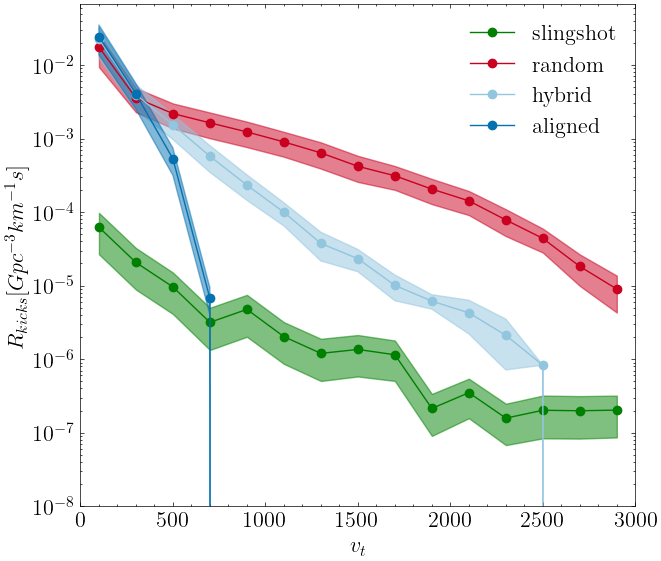

In [29]:
plt.rcParams.update({'font.size': 16})
fig = kick.plot_rate_kicks(df_trip_kick,df_weak_triples,df_binary_w_kick,v_max=3000,vbin_size=200)
#fig.legend(fontsize=13)
#fig.xlim(0,3000)
fig.savefig("Figures/Rate_of_kicks_with_vt.pdf")

## Escape Rates

Escape is when the kick velocity > escape velocity

In [30]:
import Merger_rate_plot as mr

In [31]:
def escape_rates_for_kick(df_run,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=True):

    
    rand_z = df_run[df_run["gw_kick_random"]>df_run["Vescape"]]["z_merger"]
    hybrid_z = df_run[df_run["gw_kick_hybrid"]>df_run["Vescape"]]["z_merger"]
    deg5_z = df_run[df_run["gw_kick_5deg"]>df_run["Vescape"]]["z_merger"]

    
    rand_mr,rand_lgzbins_Tr,rand_rate = mr.merger_rate_log_plot(rand_z,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax)
    hybrid_mr,hybrid_lgzbins_Tr,hybrid_rate = mr.merger_rate_log_plot(hybrid_z,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax)
    deg5_mr,deg5_lgzbins_Tr,deg5_rate = mr.merger_rate_log_plot(deg5_z,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax)

    if(sling_flag==True):
        sling_z = df_run[df_run["Slingshot_kick"]>df_run["Vescape"]]["z_merger"]
        sling_mr,sling_lgzbins_Tr,sling_rate = mr.merger_rate_log_plot(sling_z,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax)
        return sling_lgzbins_Tr,[sling_rate,rand_rate,hybrid_rate,deg5_rate]
    else:
        return rand_lgzbins_Tr,[rand_rate,hybrid_rate,deg5_rate]

In [32]:
Nruns=100
Ntriple=520

In [33]:
def triples_only_escape_rate(zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax):

    net_sling_rate = []
    net_rand_rate = []
    net_hybrid_rate = []
    net_deg5_rate = []


    for i in range(Nruns):
        df_strong_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
        strong_esc = escape_rates_for_kick(df_strong_i,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=True)[1:][0]
        #weak_esc = escape_rates_for_kick(df_weak_triples,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=False)[1:][0]

        net_sling_rate.append(strong_esc[0])
        net_rand_rate.append(strong_esc[1])
        net_hybrid_rate.append(strong_esc[2])
        net_deg5_rate.append(strong_esc[3])

    lgzbins_Tr = escape_rates_for_kick(df_weak_triples,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=False)[0]

    return lgzbins_Tr,net_sling_rate,net_rand_rate,net_hybrid_rate,net_deg5_rate

In [34]:
lgzbins_Tr,sling_Tr,rand_Tr,hybrid_Tr,deg5_Tr = triples_only_escape_rate(zmax=4,zbinsize=0.01,lgzbins_Trize=0.25,lgzmin=-3,lgzmax=1.0)

/Users/pranavsatheesh/miniconda3/envs/ast/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
filepath='/Users/pranavsatheesh/Triples/Github/Illustris_Data/'
lgztrip_bins,alltrip_mr = np.loadtxt(filepath+"triple_system.txt")
lgz_bins,all_mr = np.loadtxt(filepath+"all_system.txt")

In [36]:
def all_escape_rate(zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax):

    net_sling_rate = []
    net_rand_rate = []
    net_hybrid_rate = []
    net_deg5_rate = []

    for i in range(Nruns):
        df_strong_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
        strong_esc = escape_rates_for_kick(df_strong_i,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=True)[1:][0]
        weak_esc = escape_rates_for_kick(df_weak_triples,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=False)[1:][0]
        binary_esc = escape_rates_for_kick(df_iso_binary_w_kick,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=False)[1:][0]

        net_sling_rate.append(strong_esc[0])
        net_rand_rate.append(strong_esc[1]+weak_esc[0]+binary_esc[0])
        net_hybrid_rate.append(strong_esc[2]+weak_esc[1]+binary_esc[1])
        net_deg5_rate.append(strong_esc[3]+weak_esc[2]+binary_esc[2])

    lgzbins_Tr = escape_rates_for_kick(df_weak_triples,zmax,zbinsize,lgzbins_Trize,lgzmin,lgzmax,sling_flag=False)[0]

    return lgzbins_Tr,net_sling_rate,net_rand_rate,net_hybrid_rate,net_deg5_rate 

In [37]:
lgzbins_all,sling_all,rand_all,hybrid_all,deg5_all = all_escape_rate(zmax=4,zbinsize=0.01,lgzbins_Trize=0.2,lgzmin=-3,lgzmax=1.0)

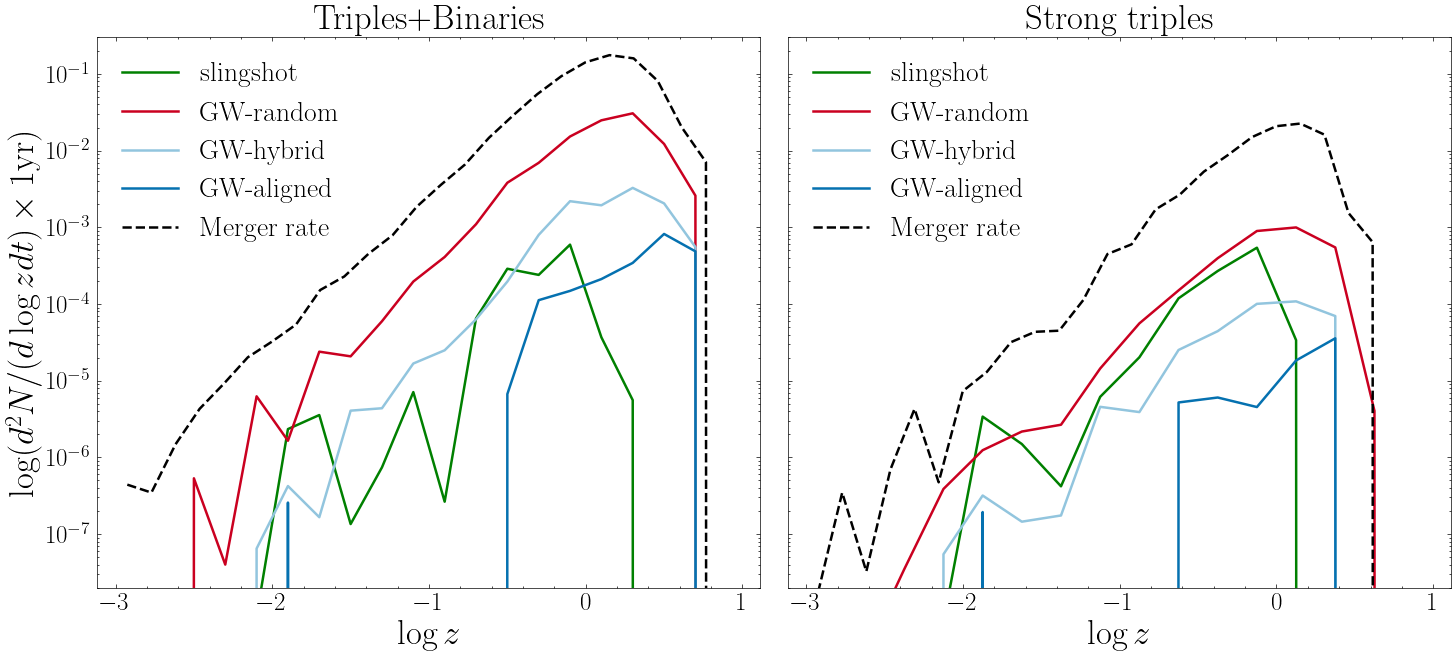

In [45]:
fig,ax = plt.subplots(1,2,figsize=(15,7),sharey=True)
plt.rcParams.update({'font.size': 18})
ax[1].plot(lgzbins_Tr,np.mean(sling_Tr,axis=0),color="green",label="slingshot",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(rand_Tr,axis=0),color="#ca0020",label="GW-random",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(hybrid_Tr,axis=0),color="#92c5de",label="GW-hybrid",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(deg5_Tr,axis=0),color="#0571b0",label="GW-aligned",linewidth=1.8)
ax[1].plot(lgztrip_bins,alltrip_mr,color="black",linestyle="--",label="Merger rate",linewidth=1.8)
ax[1].set_ylim(2*10**-8,)
ax[1].set_yscale("log")
ax[1].set_xlabel("$\log z$",fontsize=25)
#ax[1].set_ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=14)
ax[1].legend(fontsize=20)
ax[1].set_title("Strong triples",fontsize=25)


ax[0].plot(lgzbins_all,np.mean(sling_all,axis=0),color="green",label="slingshot",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(rand_all,axis=0),color="#ca0020",label="GW-random",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(hybrid_all,axis=0),color="#92c5de",label="GW-hybrid",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(deg5_all,axis=0),color="#0571b0",label="GW-aligned",linewidth=1.8)
ax[0].plot(lgz_bins,all_mr,color="black",linestyle="--",label="Merger rate",linewidth=1.8)
ax[0].set_ylim(2*10**-8,3*1e-1)
ax[0].set_yscale("log")
ax[0].set_xlabel("$\log z$",fontsize=25)
ax[0].set_ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=25)
ax[0].legend(fontsize=20)
ax[0].set_title("Triples+Binaries",fontsize=25)
fig.tight_layout()
fig.savefig("Figures/Escape_rates_and_merger_rates.pdf")

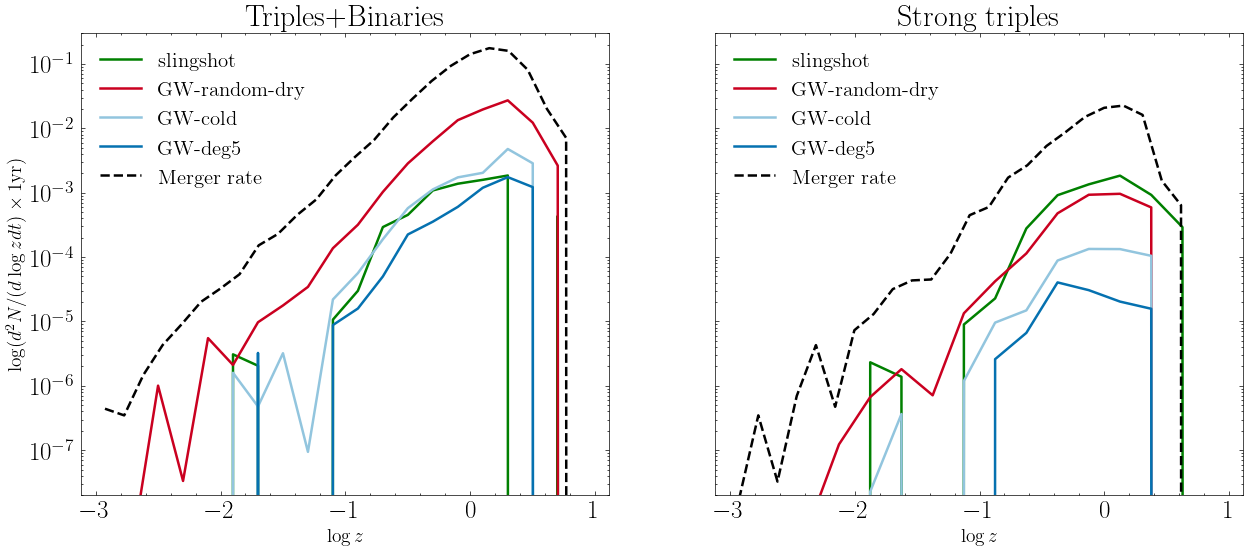

In [63]:
fig,ax = plt.subplots(1,2,figsize=(15,6),sharey=True)
plt.rcParams.update({'font.size': 18})
ax[1].plot(lgzbins_Tr,np.mean(sling_Tr,axis=0),color="green",label="slingshot",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(rand_Tr,axis=0),color="#ca0020",label="GW-random-dry",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(hybrid_Tr,axis=0),color="#92c5de",label="GW-hybrid",linewidth=1.8)
ax[1].plot(lgzbins_Tr,np.mean(deg5_Tr,axis=0),color="#0571b0",label="GW-deg5",linewidth=1.8)
ax[1].plot(lgztrip_bins,alltrip_mr,color="black",linestyle="--",label="Merger rate",linewidth=1.8)
ax[1].set_ylim(2*10**-8,)
ax[1].set_yscale("log")
ax[1].set_xlabel("$\log z$",fontsize=14)
#ax[1].set_ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=14)
ax[1].legend(fontsize=15)
ax[1].set_title("Strong triples")


ax[0].plot(lgzbins_all,np.mean(sling_all,axis=0),color="green",label="slingshot",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(rand_all,axis=0),color="#ca0020",label="GW-random-dry",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(hybrid_all,axis=0),color="#92c5de",label="GW-hybrid",linewidth=1.8)
ax[0].plot(lgzbins_all,np.mean(deg5_all,axis=0),color="#0571b0",label="GW-deg5",linewidth=1.8)
ax[0].plot(lgz_bins,all_mr,color="black",linestyle="--",label="Merger rate",linewidth=1.8)
ax[0].set_ylim(2*10**-8,3*1e-1)
ax[0].set_yscale("log")
ax[0].set_xlabel("$\log z$",fontsize=14)
ax[0].set_ylabel(r"$\log (d^2 N / (d \log z dt)  \times 1\text{yr})$",fontsize=14)
ax[0].legend(fontsize=15)
ax[0].set_title("Triples+Binaries")
fig.tight_layout#()
fig.savefig("Figures/Escape_rates_and_merger_rates.pdf")

### vk vs vesc

In [24]:
df_trip_kick

,M1,M2,M3,qin,qout,t_merger,z_merger,t_form,a_triple_int,merger_flag,Slingshot_kick,gw_kick_random,gw_kick_hybrid,gw_kick_5deg,binary_merger_flag,Vescape
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,1.752527e+09,3.630205,1.352693e+09,0.035402,Tr-ej,2201.057217,269.751613,72.946300,70.081552,Yes,3429.773746
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,1.139149e+10,0.192264,5.596503e+09,0.213378,Tr-ej,803.621211,1288.425417,155.365717,112.601116,Yes,1390.661938
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,8.375550e+10,0.000000,1.100114e+10,0.056183,No,1611.662895,0.000000,0.000000,0.000000,No,851.131643
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,1.037072e+11,0.000000,1.303832e+10,0.071615,No,851.491213,0.000000,0.000000,0.000000,No,827.301270
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,4.006093e+10,0.000000,3.438074e+09,0.166512,No,270.385087,0.000000,0.000000,0.000000,No,498.691989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,2.367520e+07,3.030512e+06,1.673779e+07,0.128004,0.626749,1.694833e+10,0.000000,1.231843e+10,0.734653,No,377.811960,0.000000,0.000000,0.000000,No,1191.524846
51996,2.502891e+08,2.214000e+07,1.692168e+06,0.088458,0.006211,1.370878e+10,0.004275,1.358717e+10,0.078199,Tr-ej,666.054238,54.546800,151.902018,46.848398,No,2177.574975
51997,1.326529e+07,8.323477e+06,6.823273e+06,0.627463,0.316057,1.321957e+10,0.040065,1.311341e+10,0.352233,Tr-12,137.770169,501.356811,404.080872,81.565780,No,927.018908
51998,4.601341e+07,9.537147e+06,5.338969e+07,0.207269,0.961101,1.507054e+10,0.000000,1.355824e+10,1.371466,No,452.410766,0.000000,0.000000,0.000000,No,1574.831536


In [34]:
tot_MBH = []
for i in range(len(df_trip_kick)):
    if(df_trip_kick["merger_flag"].iloc[i]=="Tr-12"):
        tot_MBH.append(df_trip_kick["M1"].iloc[i]+df_trip_kick["M2"].iloc[i])
    elif(df_trip_kick["merger_flag"].iloc[i]=="Tr-13"):
        tot_MBH.append(df_trip_kick["M1"].iloc[i]+df_trip_kick["M3"].iloc[i])
    elif(df_trip_kick["merger_flag"].iloc[i]=="Tr-23"):
        tot_MBH.append(df_trip_kick["M2"].iloc[i]+df_trip_kick["M3"].iloc[i])
    elif(df_trip_kick["merger_flag"].iloc[i]=="Tr-ej"):
        m_sorted = np.sort([df_trip_kick["M1"].iloc[i],df_trip_kick["M2"].iloc[i],df_trip_kick["M3"].iloc[i]])
        tot_MBH.append(m_sorted[1]+m_sorted[2])
    else:
        tot_MBH.append(0)


In [37]:
df_trip_kick.insert(16,"tot_MBH",tot_MBH,True)

In [65]:
Nruns=100
Ntriples=520
for i in range(Nruns):
    df_trip_i = df_trip_kick[Ntriples*i:Ntriples*(i+1)]
    slingv_by_vesc1= df_trip_i[df_trip_i["M1"]>1e6]["Slingshot_kick"]/df_trip_i[df_trip_i["M1"]>1e6]["Vescape"]
    slingv_by_vesc2= df_trip_i[df_trip_i["tot_MBH"]>1e7]["Slingshot_kick"]/df_trip_i[df_trip_i["tot_MBH"]>1e7]["Vescape"]
    slingv_by_vesc3= df_trip_i[df_trip_i["M1"]>1e8]["Slingshot_kick"]/df_trip_i[df_trip_i["M1"]>1e8]["Vescape"]
    slingv_by_vesc4= df_trip_i[df_trip_i["M1"]>1e9]["Slingshot_kick"]/df_trip_i[df_trip_i["M1"]>1e9]["Vescape"]

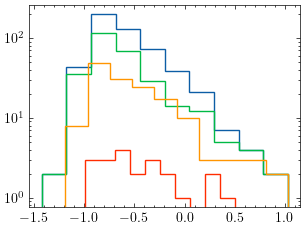

In [73]:
plt.hist(np.log10(slingv_by_vesc1[slingv_by_vesc1>0]),histtype="step")
plt.hist(np.log10(slingv_by_vesc2),histtype="step")
plt.hist(np.log10(slingv_by_vesc3[slingv_by_vesc3>0]),histtype="step")
plt.hist(np.log10(slingv_by_vesc4[slingv_by_vesc4>0]),histtype="step")
plt.yscale("log")

In [74]:
df_trip_kick

,M1,M2,M3,qin,qout,t_merger,z_merger,t_form,a_triple_int,merger_flag,Slingshot_kick,gw_kick_random,gw_kick_hybrid,gw_kick_5deg,binary_merger_flag,Vescape,tot_MBH
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,1.752527e+09,3.630205,1.352693e+09,0.035402,Tr-ej,2201.057217,269.751613,72.946300,70.081552,Yes,3429.773746,4.583096e+07
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,1.139149e+10,0.192264,5.596503e+09,0.213378,Tr-ej,803.621211,1288.425417,155.365717,112.601116,Yes,1390.661938,3.687414e+08
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,8.375550e+10,0.000000,1.100114e+10,0.056183,No,1611.662895,0.000000,0.000000,0.000000,No,851.131643,0.000000e+00
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,1.037072e+11,0.000000,1.303832e+10,0.071615,No,851.491213,0.000000,0.000000,0.000000,No,827.301270,0.000000e+00
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,4.006093e+10,0.000000,3.438074e+09,0.166512,No,270.385087,0.000000,0.000000,0.000000,No,498.691989,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,2.367520e+07,3.030512e+06,1.673779e+07,0.128004,0.626749,1.694833e+10,0.000000,1.231843e+10,0.734653,No,377.811960,0.000000,0.000000,0.000000,No,1191.524846,0.000000e+00
51996,2.502891e+08,2.214000e+07,1.692168e+06,0.088458,0.006211,1.370878e+10,0.004275,1.358717e+10,0.078199,Tr-ej,666.054238,54.546800,151.902018,46.848398,No,2177.574975,2.724291e+08
51997,1.326529e+07,8.323477e+06,6.823273e+06,0.627463,0.316057,1.321957e+10,0.040065,1.311341e+10,0.352233,Tr-12,137.770169,501.356811,404.080872,81.565780,No,927.018908,2.158876e+07
51998,4.601341e+07,9.537147e+06,5.338969e+07,0.207269,0.961101,1.507054e+10,0.000000,1.355824e+10,1.371466,No,452.410766,0.000000,0.000000,0.000000,No,1574.831536,0.000000e+00


In [36]:
len(tot_MBH)

52000

In [21]:
Nruns=100
Ntriples=520
for i in range(Nruns):
    df_trip_i = df_trip_kick[Ntriples*i:Ntriples*(i+1)]
    sling_v = df_trip_i[df_trip_i["Slingshot_kick"]>0]["Slingshot_kick"]
    esc_v = df_trip_i[df_trip_i["Slingshot_kick"]>0]["Vescape"]
    slingv_by_vesc = sling_v/esc_v

In [26]:
df_trip_i["M1"]

51480    2.119978e+07
51481    2.391268e+08
51482    2.122135e+08
51483    8.239502e+07
51484    4.625245e+07
             ...     
51995    2.367520e+07
51996    2.502891e+08
51997    1.326529e+07
51998    4.601341e+07
51999    5.113468e+07
Name: M1, Length: 520, dtype: float64

In [23]:
slingv_by_vesc["M1"]

KeyError: 'M1'